In [1]:
# Install the necessary packages
!pip install -r ../requirements.txt


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
start = "2024-01-01"
end = "2024-01-31"
interval="1m"

In [3]:
from src.data_services.data_pipeline import load_and_prepare_pair

# 1. Load data
tickers = ["ADAUSDT","BTCUSDT"]
df = load_and_prepare_pair(
    x="ADAUSDT",
    y="BTCUSDT",
    start=start,
    end=end,
    interval=interval,
)
print(df.data)

                     ADAUSDT   BTCUSDT      Spread   Z-Score  ADAUSDT_scaled  \
open_time                                                                      
2024-01-01 00:00:00   0.5940  42298.61 -42298.0160  0.329324        0.772051   
2024-01-01 00:01:00   0.5947  42320.00 -42319.4053  0.318079        0.775770   
2024-01-01 00:02:00   0.5948  42325.50 -42324.9052  0.315188        0.776302   
2024-01-01 00:03:00   0.5960  42367.99 -42367.3940  0.292849        0.782678   
2024-01-01 00:04:00   0.5971  42397.23 -42396.6329  0.277477        0.788523   
...                      ...       ...         ...       ...             ...   
2024-01-30 23:56:00   0.5140  42944.52 -42944.0060 -0.010298        0.346971   
2024-01-30 23:57:00   0.5138  42931.61 -42931.0962 -0.003511        0.345909   
2024-01-30 23:58:00   0.5143  42953.51 -42952.9957 -0.015025        0.348565   
2024-01-30 23:59:00   0.5136  42941.10 -42940.5864 -0.008501        0.344846   
2024-01-31 00:00:00   0.5145  42988.80 -

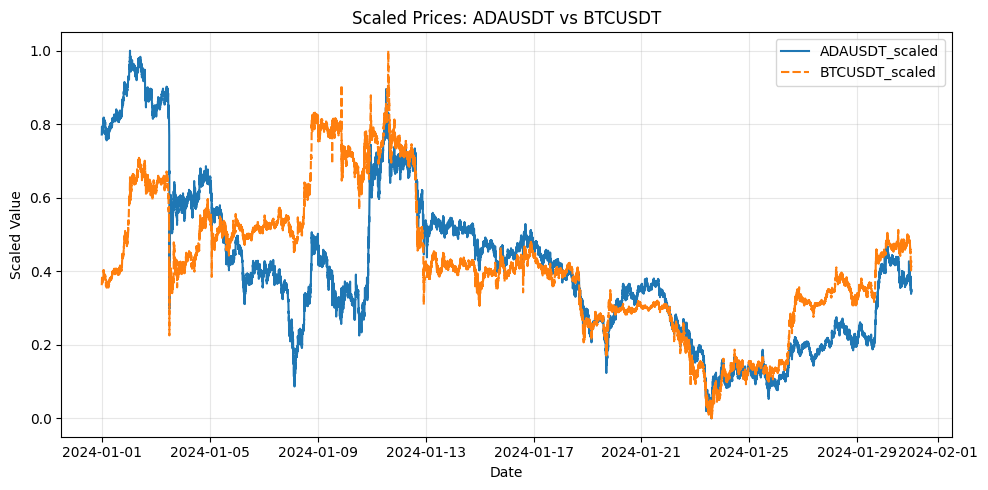

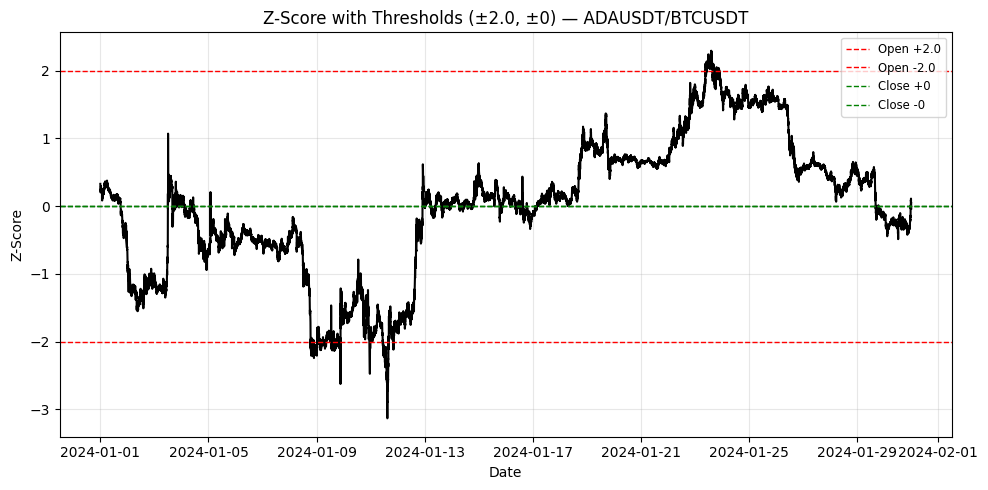

In [4]:
from src.visualization.plots import plot_scaled_prices, plot_zscore_with_thresholds

plot_scaled_prices(df, start, end, interval)
plot_zscore_with_thresholds(df, start, end, interval)

In [5]:
from src.performance.pair_trading_strategy import PairsTradingStrategy

# Initialize strategy
strategy = PairsTradingStrategy(tickers=tickers, entry_threshold=2.0, exit_threshold=0.0, size=1.0)

In [6]:
from src.performance.backtest_engine import BacktestEngine

# Initialize and run backtest engine
engine = BacktestEngine(data=df.data, strategy=strategy)
results, stats = engine.run()
print(f"Backtest statistics: {stats}")

Backtest statistics: Backtest Statistics:
Total Return %      :  11.20%
Trades              :      2
Sharpe Approx       :   0.07


                     ADAUSDT_scaled  BTCUSDT_scaled
open_time                                          
2024-01-01 00:00:00        0.772051        0.362195
2024-01-01 00:01:00        0.775770        0.364267
2024-01-01 00:02:00        0.776302        0.364799
2024-01-01 00:03:00        0.782678        0.368915
2024-01-01 00:04:00        0.788523        0.371747
...                             ...             ...
2024-01-30 23:56:00        0.346971        0.424753
2024-01-30 23:57:00        0.345909        0.423502
2024-01-30 23:58:00        0.348565        0.425623
2024-01-30 23:59:00        0.344846        0.424421
2024-01-31 00:00:00        0.349628        0.429041

[43201 rows x 2 columns]


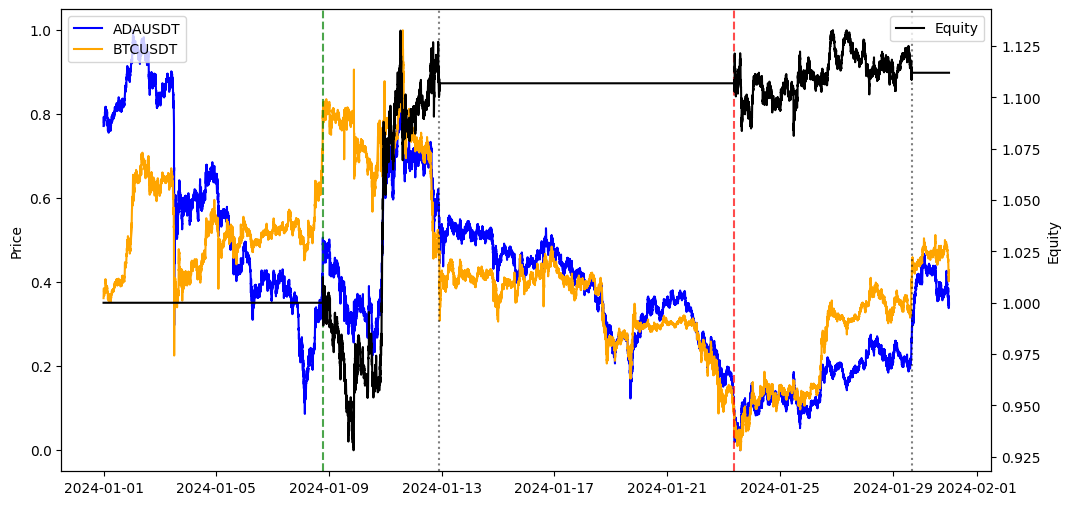

In [7]:
# Plot results
data_scaled = df.data[["ADAUSDT_scaled","BTCUSDT_scaled"]]
print(data_scaled)
engine.plot_results(data_scaled)